Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.



In [55]:
# Import modules.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import math
import re

In [56]:
# Load data.

amazon = pd.read_table('~/src/data/feedbackAnalysis/amazon_cells_labelled.txt', header=None)
amazon.columns = ['comment', 'sentiment_score']
print(amazon.shape)
amazon.head()

(1000, 2)


,comment,sentiment_score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [57]:
# Selecting words for a classifier:
# These are positive adjectives one might see in a favourable Amazon.com review.

keywords = ['great', 'good', 'really good', 'love', 'loved', 'excellent', 'best', 'strong',
            'wonderful', 'new', 'right', 'beautiful', 'pleased', 'tremendous', 'awesome',
            'incredible', 'brilliant', 'impressed']

In [58]:
# Adding boolean columns for our keywords to dataframe.

for key in keywords:
    amazon[str(key)] = amazon.comment.str.contains('' + str(key) + '', case=False)

In [69]:
# Turn sentiment_score column into boolean. 

amazon['sentiment_score'] = (amazon['sentiment_score'] == 1)

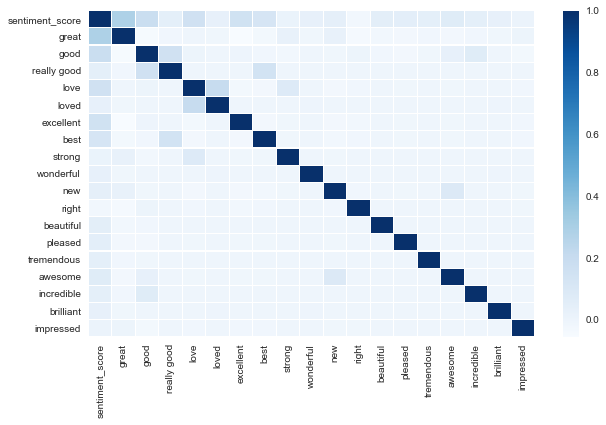

In [60]:
# Creating a correlation heatmap.
sns.set(style='white')
plt.figure(figsize=(10, 6))
sns.heatmap(amazon.corr(), linewidths=.1, cmap='Blues')

In [61]:
# Lower correlation between the variables, will use Naive Bayes Classifier Model.

data = amazon[keywords]
target = amazon['sentiment_score']

In [62]:
# Boolean data, importing Bernoulli classifier

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [67]:
# Results.

print('Number of correct predictions of Bernoulli classifier for {} datapoints : {}'.format
      (data.shape[0], (target == y_pred).sum()))

print('Number of incorrect predictions of Bernoulli classifier for {} datapoints : {}'.format
      (data.shape[0], (target != y_pred).sum()))

Number of correct predictions of Bernoulli classifier for 1000 datapoints : 709
Number of incorrect predictions of Bernoulli classifier for 1000 datapoints : 291


In [68]:
# Applying the classifier to Yelp reviews.

yelp = pd.read_table('~/src/data/feedbackAnalysis/yelp_labelled.txt', header=None)
yelp.columns = ['comment', 'sentiment_score']
print(yelp.shape)
yelp.head()

(1000, 2)


,comment,sentiment_score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


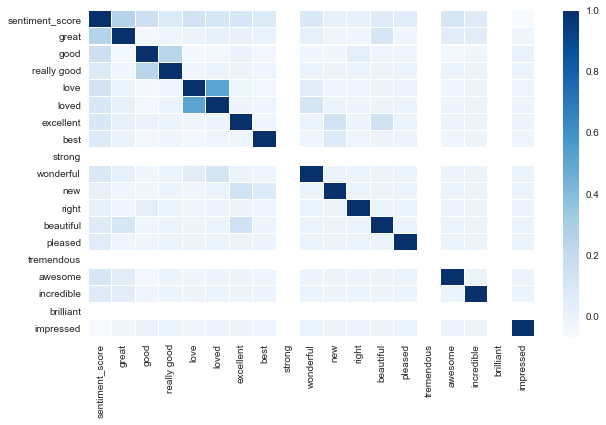

Number of correct predictions of Bernoulli classifier for 1000 datapoints : 673


In [70]:
for key in keywords:
    yelp[str(key)] = yelp.comment.str.contains('' + str(key) + '', case=False)

yelp['sentiment_score'] = (yelp['sentiment_score'] == 1)

plt.figure(figsize=(10, 6))
sns.heatmap(yelp.corr(), linewidths=.1, cmap='Blues')
plt.show()

data = yelp[keywords]
target = yelp['sentiment_score']
bnb.fit(data, target)
y_pred = bnb.predict(data)

print('Number of correct predictions of Bernoulli classifier for {} datapoints : {}'.format
      (data.shape[0], (target == y_pred).sum()))

With no changes in keywords, the training dataset model returned 67% accuracy, compared with the 70% to Amazon.